## Fitting the HESS Crab spectrum wih iminuit and emcee

So far I've just copied code over from [this tutorial](https://github.com/gammapy/PyGamma15/blob/gh-pages/tutorials/analysis-stats/spectrum_chi2.ipynb) just to make sure I can reproduce the same plot. I'll use the same dataset ([this paper from 2006](http://adsabs.harvard.edu/abs/2006A%26A...457..899A)) for now.

Next steps:

* Implement model fitting tools and do analysis with them. This is where I can play around with the tools and learn them.

* Try doing the same analysis with my own data (e.g. latest HESS surveys) 

### Imports 

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='pandas')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Data

I'm loading in data from a .txt file. THe data comes from that paper mentioned above.

In [4]:
data = pd.read_table(
    '../datasets/spectrum_crab_hess_2006/spectrum_crab_hess_2006.txt',
    comment='#', 
    sep='\s*',
    engine='python'
)

data

,energy,flux,flux_err
0,0.519,1.810000e-10,6.000000e-12
1,0.729,7.270000e-11,2.000000e-12
2,1.060,3.120000e-11,9.000000e-13
3,1.550,1.220000e-11,4.000000e-13
4,2.260,4.600000e-12,1.800000e-13
5,3.300,1.530000e-12,8.000000e-14
6,4.890,6.350000e-13,3.900000e-14
7,7.180,2.270000e-13,1.800000e-14
8,10.400,6.490000e-14,7.700000e-15
9,14.800,1.750000e-14,3.300000e-15


### The Model

In the paper, they fit a power-law with an exponential cutoff and find the following parameters (see row "all" in the paper's Table 6):


* gamma = 2.39 +- 0.03
* energy_cut = 14.3 +- 2.1 TeV
* flux1 = (3.76 +- 0.07) x 1e-11 cm^-2 s^-1 TeV^-1


The flux1 is the differential flux at 1 TeV.

In [5]:
def flux_epcl(energy, flux1, gamma, energy_cut):
    return flux1 * energy ** (-gamma) * np.exp(-energy / energy_cut)

### Plot

The curve looks almost identical to the one in their paper (Figure 18b).

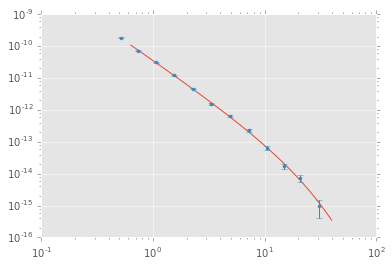

In [9]:
energy = np.logspace(-0.5, 1.6, 100)
flux = flux_epcl(energy, flux1=3.76e-11, gamma=2.39, energy_cut=14.3)

plt.plot(energy, flux)
plt.errorbar(x=data['energy'],
             y=data['flux'],
            yerr=data['flux_err'],
            fmt='.'
            )
plt.loglog();

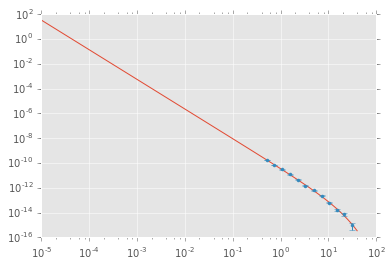

In [14]:
energy = np.logspace(-5, 1.6, 100)
flux = flux_epcl(energy, flux1=3.76e-11, gamma=2.39, energy_cut=14.3)

plt.plot(energy, flux)
plt.errorbar(x=data['energy'],
             y=data['flux'],
            yerr=data['flux_err'],
            fmt='.'
            )
plt.loglog();